 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/work/biskets/phenology-baps/spring-indices/annual-indices-of-spring.ipynb#Purpose" data-toc-modified-id="Purpose-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="http://localhost:8888/notebooks/work/biskets/phenology-baps/spring-indices/annual-indices-of-spring.ipynb#Dependencies" data-toc-modified-id="Dependencies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dependencies</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/work/biskets/phenology-baps/spring-indices/annual-indices-of-spring.ipynb#R-installation" data-toc-modified-id="R-installation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>R installation</a></span></li><li><span><a href="http://localhost:8888/notebooks/work/biskets/phenology-baps/spring-indices/annual-indices-of-spring.ipynb#An-R-kernel-for-Jupyter-notebooks" data-toc-modified-id="An-R-kernel-for-Jupyter-notebooks-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>An R kernel for Jupyter notebooks</a></span></li><li><span><a href="http://localhost:8888/notebooks/work/biskets/phenology-baps/spring-indices/annual-indices-of-spring.ipynb#Load-the-R-libraries" data-toc-modified-id="Load-the-R-libraries-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Load the R libraries</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/work/biskets/phenology-baps/spring-indices/annual-indices-of-spring.ipynb#Inputs" data-toc-modified-id="Inputs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Inputs</a></span></li><li><span><a href="http://localhost:8888/notebooks/work/biskets/phenology-baps/spring-indices/annual-indices-of-spring.ipynb#Outputs" data-toc-modified-id="Outputs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Outputs</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/work/biskets/phenology-baps/spring-indices/annual-indices-of-spring.ipynb#Histogram" data-toc-modified-id="Histogram-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Histogram</a></span></li><li><span><a href="http://localhost:8888/notebooks/work/biskets/phenology-baps/spring-indices/annual-indices-of-spring.ipynb#Boxplots" data-toc-modified-id="Boxplots-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Boxplots</a></span></li><li><span><a href="http://localhost:8888/notebooks/work/biskets/phenology-baps/spring-indices/annual-indices-of-spring.ipynb#Ridgeline-Plots" data-toc-modified-id="Ridgeline-Plots-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Ridgeline Plots</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/work/biskets/phenology-baps/spring-indices/annual-indices-of-spring.ipynb#Code" data-toc-modified-id="Code-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Code</a></span></li><li><span><a href="http://localhost:8888/notebooks/work/biskets/phenology-baps/spring-indices/annual-indices-of-spring.ipynb#Provenance" data-toc-modified-id="Provenance-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Provenance</a></span></li><li><span><a href="http://localhost:8888/notebooks/work/biskets/phenology-baps/spring-indices/annual-indices-of-spring.ipynb#Citations" data-toc-modified-id="Citations-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Citations</a></span></li></ul></div>

# Purpose
The purpose of this analysis package is to guide the seasonal allocation of resources by managers of protected areas using information modeled, produced, and disseminated by the [National Phenology Network](https://www.usanpn.org/usa-national-phenology-network) (NPN). This package uses NPN information on phenological changes to support management decisions on the timing and coordination of season-specific activities within the boundaries of the management unit. The specific use case was for a manager to use NPN's Annual Indices of Spring model product to help inform the timing and location of treaments within their protected area.

# Dependencies
Several software packages are required to run this scientific code in a Jupyter notebook.

## R installation
   Instructions on installing the R software environment is available at the [R Project](https://www.r-project.org). Several R libraries, listed below, are used for the analysis. Instructions for finding and installing libraries are also available at the R Project website.
   
## An R kernel for Jupyter notebooks

   This notebook uses [IRkernel](https://irkernel.github.io). At the time of this writing (2018-05-06), Karlijn Willems provides excellent guidance on installing the IRkernel and running R in a Jupyter notebook in her article entitled ["Jupyter And R Markdown: Notebooks With R"](https://www.datacamp.com/community/blog/jupyter-notebook-r#markdown)  

An understanding of the National Phenology Network's suite of [models and maps.](https://www.usanpn.org/data/maps) is  required to properly use this analysis and assess the results.

## Load the R libraries

In [2]:
library(tidyverse)
library(ggplot2)
library(ggridges)
library(jsonlite)
library(viridis)

# Inputs
The operational BAP prototype retrieves data in real-time from the [National Phenology Network](https://www.usanpn.org)'s Web Processing Service using a developer key issued by NPN. This notebook provides a previously retrieved data file, [YellowstoneNP-1981-2016-processed-numbers.json](./YellowstoneNP-1981-2016-processed-numbers.json), for those who do not have a personal developer key. Annual data for Yellowstone National Park for all available years was retrieved 2018-01-27 and lightly processed for ingest.

In [4]:
# transform the BIS emitted JSON into something ggplot2 can work with
yell <- read_json("YellowstoneNP-1981-2016-processed-numbers.json", simplifyDataFrame = TRUE, simplifyVector = TRUE, flatten = TRUE)
yelldf <- as_tibble(yell)
yellt <- gather(yelldf, Year, DOY)

# Outputs

## Histogram
Produce a histogram of all modeled results for Yellowstone National Park for all available years.

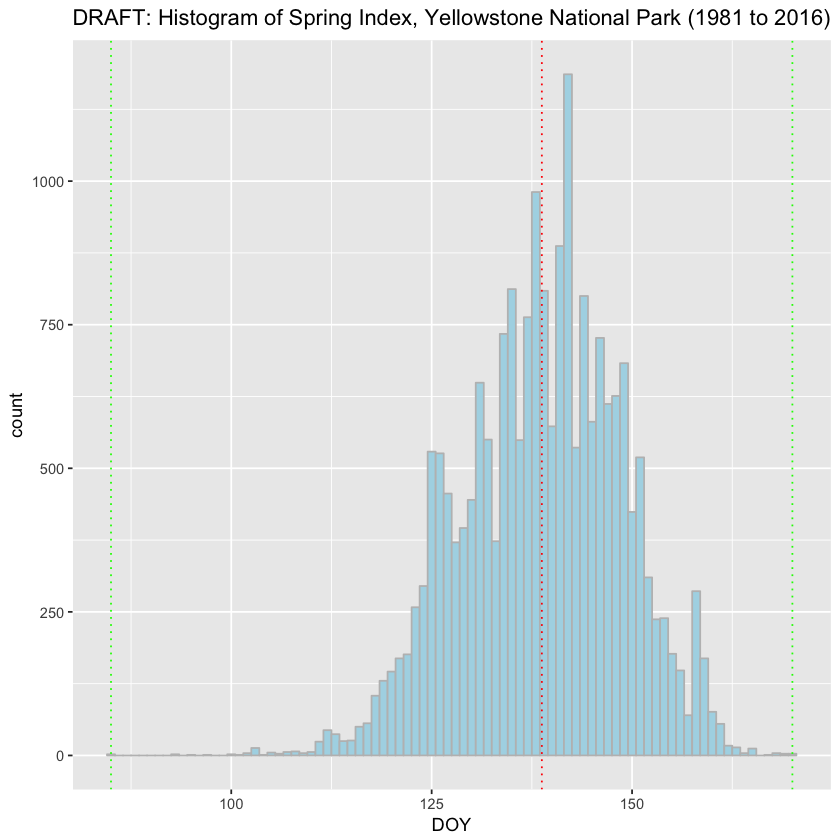

In [5]:
# produce a histogram for all years
ggplot(yellt, aes(DOY)) +
  geom_histogram(binwidth = 1, color = "grey", fill = "lightblue") +
  ggtitle("DRAFT: Histogram of Spring Index, Yellowstone National Park (1981 to 2016)") +
  geom_vline(aes(xintercept=mean(DOY, na.rm=T)), color = "red", linetype = "dotted", size = 0.5) +
  geom_vline(aes(xintercept = min(DOY, na.rm=T)), color = "green", linetype = "dotted", size = 0.5) +
  geom_vline(aes(xintercept = max(DOY, na.rm=T)), color = "green", linetype = "dotted", size = 0.5)

## Boxplots 
Produce boxplots of the modeled results for Yellowstone National Park for each available years.

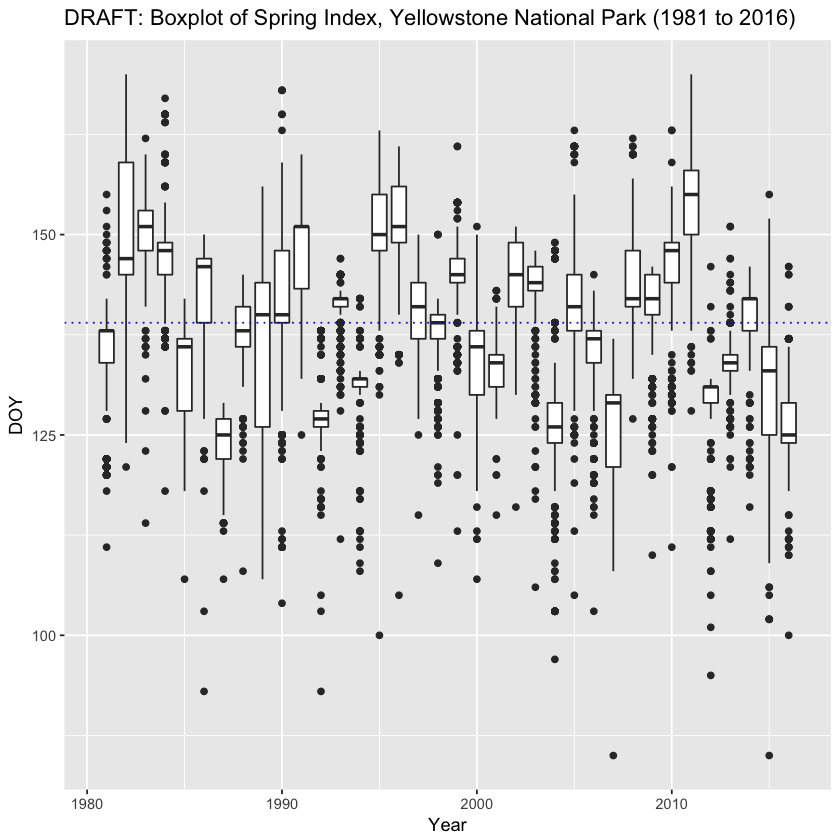

In [8]:
# boxplot for each year
ggplot(yellt, aes(y = DOY, x = Year, group = Year)) +
  geom_boxplot() +
  geom_hline(aes(yintercept = median(DOY, na.rm=T)), color = "blue", linetype = "dotted", size = 0.5) +
  ggtitle("DRAFT: Boxplot of Spring Index, Yellowstone National Park (1981 to 2016)")

## Ridgeline Plots
Produce ridgeline plots for each year

Picking joint bandwidth of 1.06


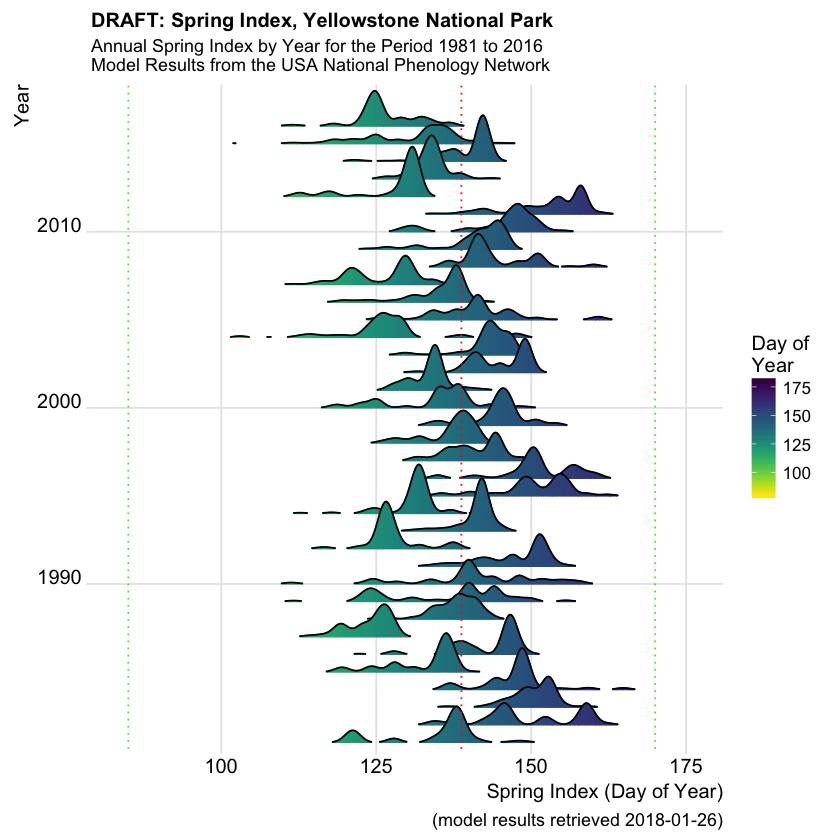

In [10]:
# ridgeline plot with gradient coloring based on day of year for each available year
ggplot(yellt, aes(x = DOY, y = Year, group = Year, fill = ..x..)) +
  geom_density_ridges_gradient(scale = 3, rel_min_height = 0.01, gradient_lwd = 1.0, from = 80, to = 180) +
  scale_x_continuous(expand = c(0.01, 0)) +
  scale_y_continuous(expand = c(0.01, 0)) +
  scale_fill_viridis(name = "Day of\nYear", option = "D", direction = -1) +
  labs(title = 'DRAFT: Spring Index, Yellowstone National Park',
       subtitle = 'Annual Spring Index by Year for the Period 1981 to 2016\nModel Results from the USA National Phenology Network',
       y = 'Year',
       x = 'Spring Index (Day of Year)',
       caption = "(model results retrieved 2018-01-26)") +
  theme_ridges(font_size = 12, grid = TRUE) +
  geom_vline(aes(xintercept = mean(DOY, na.rm=T)), color = "red", linetype = "dotted", size = 0.5) +
  geom_vline(aes(xintercept = min(DOY, na.rm=T)), color = "green", linetype = "dotted", size = 0.5) +
  geom_vline(aes(xintercept = max(DOY, na.rm=T)), color = "green", linetype = "dotted", size = 0.5) 

# Code
Code is available at the [usgs-bcb/phenology-baps](https://github.com/usgs-bcb/phenology-baps) GitHub repository. 

# Provenance
This prototype analysis package was a collaborative development effort between USGS [Core Science Analytics, Synthesis, and Libraries](https://www.usgs.gov/science/mission-areas/core-science-systems/csasl?qt-programs_l2_landing_page=0#qt-programs_l2_landing_page) and the [USA National Phenology Network](https://www.usanpn.org). Members of the scientific development team met (list) and discussed use cases, analyses, and visualizations during the third quarter of 2016. This notebook was built upon group discussions and Tristan Wellman's initial ideas for processing and visualization the NPN spring index data. That body of work and other suppporting code is available at his GitHub repository, [TWellman/USGS_BCB-NPN-Dev-Space](https://github.com/TWellman/USGS_BCB-NPN-Dev-Space). Software developers at the Fort Collins Science Center worked with members of the team to operationalize the scientific code and make it publically available on the web. An initial prototype application is available at (https://my-beta.usgs.gov/phenology/). The site is currently passworded pending successful review.

# Citations
Schwartz, M. D., T. R. Ault, and J. L. Betancourt, 2013: Spring onset variations and trends in the continental United States: past and regional assessment using temperature-based indices. International Journal of Climatology, 33, 2917–2922, 10.1002/joc.3625.